**This notebook is for background analysis of GCAM transportation data. It analyzes and displays energy by vehicle type, mode, and more**

In [1]:
###---Transportation energy in WECC projected by GCAM over years and decarbonizatuon path---
###---by vehcicle types and GCAM sectors---

import os
import pandas as pd
import numpy as np


EJ_to_TWh                = 1e6*0.000277778 
wecc_states              = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

years                    = [2025, 2030, 2035, 2040, 2045, 2050]
GCAM_cases               = ['NetZeroNoCCS_Climate','BAU_Climate'] 


##--- Calculating Energy for Subsectors---

df_subsector_energy      = pd.DataFrame()

for year in years:

    for case in GCAM_cases:
   
        energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + case +'.csv'))      
        subsectors          = energy_by_mode_and_fuel.subsector.unique()
        MWh_subsectors      = [] 

        for subsector in subsectors:

            energy_ev = energy_by_mode_and_fuel[
                            energy_by_mode_and_fuel['subsector'].isin([subsector])]

            energy_ev_wecc          = energy_ev[energy_ev['region'].isin(wecc_states)].reset_index(drop=True)
            energy_ev_wecc_year     = energy_ev_wecc[energy_ev_wecc['Year'].isin([year])].reset_index(drop=True)
            MWh_ev_wecc             = energy_ev_wecc_year['value'].sum()*EJ_to_TWh 
            MWh_ev_wecc

            MWh_subsectors.append(MWh_ev_wecc) 
            
            
        df_subsector_energy['subsector'] = subsectors
        col_name = str(year) + '_' + case
        df_subsector_energy[col_name] = MWh_subsectors

                                        
display("Electric Energy by GCAM subsector:",  df_subsector_energy)

#---write to .csv--- 
# df_subsector_energy.to_csv(os.path.join('..', 'output', 'subsectors_energy_in_TWh.csv'), index=False)



##--- Calculating Energy for Vehicle Type---

ldv      = ['2W and 3W', 'Car', 'Large Car and Truck', 'Mini Car', 'Light truck']

mdv      = ['Medium truck']

hdv      = ['Bus', 'Heavy truck']

Non_road = ['International Aviation', 'Domestic Ship', 'Freight Rail', 'Domestic Aviation', 'HSR', 'Passenger Rail', 'International Ship']
 
vechtypes          = {}
vech_type_energy   = []
vechtypes          = dict({"ldv": ldv, "mdv": mdv, "hdv": hdv, "Non_road": Non_road})

for vechtype, vech_list in vechtypes.items():
    
    vech_group     = (df_subsector_energy[df_subsector_energy['subsector'].isin(vech_list)]).set_index('subsector')
    sum_vech_group = vech_group.iloc[:,:].sum()
    vech_type_energy.append(np.array(sum_vech_group))
    
df_vechtype_energy = pd.DataFrame(vech_type_energy, index = list(vechtypes.keys()), columns = list(sum_vech_group.index))
df_vechtype_energy.reset_index(inplace=True)

display("Electric Energy by Vechicle Type:", df_vechtype_energy)

#---write to .csv---                                      
# df_vechtype_energy.to_csv(os.path.join('..', 'output', 'vech_type_energy_in_TWh.csv'), index=False)



##---Calculating Energy for All Vehicle Types----


ldv      = ['2W and 3W', 'Car', 'Large Car and Truck', 'Mini Car', 'Light truck']

mdv      = ['Medium truck']

hdv      = ['Bus', 'Heavy truck']

rail     = [ 'Freight Rail', 'HSR', 'Passenger Rail']

aviation = ['International Aviation',  'Domestic Aviation']

ship     = [ 'Domestic Ship', 'International Ship']
 
vechtypes          = {}
vech_type_energy   = []
vechtypes          = dict({"ldv": ldv, "mdv": mdv, "hdv": hdv, "rail": rail, "aviation": aviation, "ship": ship})

for vechtype, vech_list in vechtypes.items():
    
    vech_group     = (df_subsector_energy[df_subsector_energy['subsector'].isin(vech_list)]).set_index('subsector')
    sum_vech_group = vech_group.iloc[:,:].sum()
    vech_type_energy.append(np.array(sum_vech_group))
    
df_vechtype_energy = pd.DataFrame(vech_type_energy, index = list(vechtypes.keys()), columns = list(sum_vech_group.index))
df_vechtype_energy.reset_index(inplace=True)

display("Electric Energy by Vechicle Type All:", df_vechtype_energy)

#---write to  .csv---                      
# df_vechtype_energy.to_csv(os.path.join('..', 'output', 'vech_type_all_energy_in_TWh.csv'), index=False)

'Electric Energy by GCAM subsector:'

,subsector,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,International Aviation,51.288294,52.835586,50.293913,51.854030,47.662394,50.002094,46.436942,52.349765,42.951515,54.540076,38.202462,56.957639
1,Domestic Ship,34.233383,40.342017,36.168961,43.763018,30.186036,39.879806,21.861971,40.858175,22.449002,40.484960,21.027993,40.670087
2,Freight Rail,24.547029,24.678489,23.806510,23.903880,22.753991,23.013634,23.503942,23.779120,21.895106,25.400285,19.070657,27.122616
3,Heavy truck,141.429851,149.056034,133.134494,147.438463,126.492395,145.178274,112.085101,156.965442,81.259757,158.872291,81.636522,162.993058
4,Light truck,62.414244,61.511257,57.363601,55.302250,51.482067,49.041210,38.077641,35.180524,39.697498,35.298138,43.071250,37.095728
5,Medium truck,171.673731,181.355945,172.963577,177.877836,155.033758,163.237890,126.768282,143.543019,80.130672,145.693386,77.135247,151.193969
6,Domestic Aviation,207.638344,221.504616,184.184367,196.957410,165.827133,184.297918,144.160046,190.789149,111.063727,194.244021,107.290101,196.898986
7,HSR,0.176557,0.179624,0.253333,0.260221,0.354793,0.373390,0.513028,0.543527,0.701801,0.756662,0.922788,1.020688
8,Passenger Rail,2.253163,2.299734,2.053301,2.106907,2.049177,2.142686,2.009682,2.205607,1.906560,2.259164,1.806023,2.317898
9,Bus,23.775040,23.813620,16.984584,17.035811,12.780475,12.888536,9.470151,9.863603,7.281788,8.389927,5.213007,7.504428


'Electric Energy by Vechicle Type:'

,index,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,ldv,668.279275,672.913608,510.787509,513.831980,457.564856,464.172358,430.256041,445.029905,404.030950,435.436102,377.751541,432.018048
1,mdv,171.673731,181.355945,172.963577,177.877836,155.033758,163.237890,126.768282,143.543019,80.130672,145.693386,77.135247,151.193969
2,hdv,165.204891,172.869655,150.119079,164.474274,139.272870,158.066810,121.555252,166.829045,88.541545,167.262218,86.849529,170.497486
3,Non_road,459.752251,492.161496,436.232366,470.925574,392.636790,441.054557,343.117423,452.557953,275.450137,460.163168,260.775210,469.749548


'Electric Energy by Vechicle Type All:'

,index,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,ldv,668.279275,672.913608,510.787509,513.831980,457.564856,464.172358,430.256041,445.029905,404.030950,435.436102,377.751541,432.018048
1,mdv,171.673731,181.355945,172.963577,177.877836,155.033758,163.237890,126.768282,143.543019,80.130672,145.693386,77.135247,151.193969
2,hdv,165.204891,172.869655,150.119079,164.474274,139.272870,158.066810,121.555252,166.829045,88.541545,167.262218,86.849529,170.497486
3,rail,26.976749,27.157846,26.113144,26.271008,25.157961,25.529710,26.026652,26.528254,24.503467,28.416112,21.799468,30.461201
4,aviation,258.926638,274.340202,234.478280,248.811440,213.489527,234.300012,190.596989,243.138914,154.015242,248.784097,145.492563,253.856625
5,ship,173.848864,190.663448,175.640942,195.843126,153.989301,181.224835,126.493782,182.890784,96.931427,182.962959,93.483179,185.431722


In [2]:
###---Transportation energy in GCAM in WECC by mode of fuel---

import os
import pandas as pd
import numpy as np


EJ_to_TWh                = 1e6*0.000277778 
wecc_states              = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

years                    = [2025, 2030, 2035, 2040, 2045, 2050]
GCAM_cases               = ['NetZeroNoCCS_Climate','BAU_Climate'] 

energy_mode              = ['elect_td_trn', 'H2 wholesale dispensing','refined liquids enduse', 'H2 retail dispensing', 
                                             'delivered gas', 'delivered coal']

##--- Calculating Energy for Subsectors---

df_trans_energy_mode      = pd.DataFrame()

for year in years:

    for case in GCAM_cases:
   
        energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + case +'.csv'))
        subsectors          = energy_by_mode_and_fuel.subsector.unique()
        EJ_energy_mode      = [] 

        for mode in energy_mode:

            energy_trans               = energy_by_mode_and_fuel[(energy_by_mode_and_fuel['input'] == mode)]

            energy_trans_wecc          = energy_trans[energy_trans['region'].isin(wecc_states)].reset_index(drop=True)
            energy_trans_wecc_year     = energy_trans_wecc[energy_trans_wecc['Year'].isin([year])].reset_index(drop=True)
            EJ_trans_wecc              = energy_trans_wecc_year['value'].sum()*1 
            EJ_trans_wecc

            EJ_energy_mode.append(EJ_trans_wecc) 
            
            
        df_trans_energy_mode['energy_mode'] = energy_mode 
        col_name = str(year) + '_' + case
        df_trans_energy_mode[col_name] = EJ_energy_mode

display("Transporation Energy by Fuel Mode:", df_trans_energy_mode)                                      

#---write to .csv--- 
# df_trans_energy_mode.to_csv(os.path.join('..', 'input', 'transportation_energy_in_EJ.csv'), index=False)

'Transporation Energy by Fuel Mode:'

,energy_mode,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,elect_td_trn,0.150180,0.141196,0.315257,0.300845,0.479221,0.452949,0.680541,0.575336,1.123982,0.699678,1.459964,0.810114
1,H2 wholesale dispensing,0.001646,0.001649,0.006338,0.006318,0.013781,0.014516,0.021576,0.022101,0.117220,0.033835,0.293032,0.054724
2,refined liquids enduse,5.101876,5.306369,4.201675,4.420331,3.538710,3.856155,2.822918,3.606080,1.385878,3.407131,0.392115,3.262546
3,H2 retail dispensing,0.010959,0.011229,0.042337,0.043303,0.083463,0.086722,0.149516,0.141239,0.424162,0.207205,0.743082,0.274641
4,delivered gas,0.009010,0.009036,0.006760,0.006794,0.005051,0.005168,0.003556,0.003896,0.002108,0.002945,0.000846,0.002424
5,delivered coal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


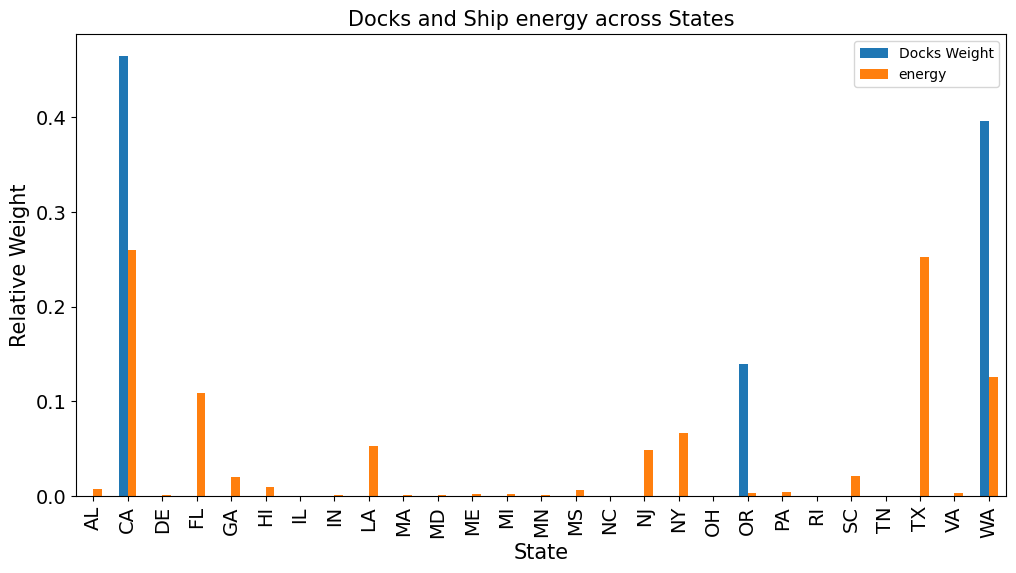

Correleation between Docks and Ship Energy in GCAM is: 0.9389853071314862


In [4]:
###---Corelation between Ship Energy in GCAM and and Docks in WECC States---

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import AutoMinorLocator

us_states        = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                    'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY','LA', 'MA', 'MD', 'ME', 
                    'MI', 'MN', 'MO', 'MS', 'MT','NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 
                    'NV', 'NY', 'OH', 'OK','OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 
                    'UT', 'VA','VT', 'WA', 'WI', 'WV', 'WY']

wecc_states      = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']


us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}


# invert the dictionary

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

#---- User-Defined Inputs----

year       = 2025

subsector  = ['Domestic Ship', 'International Ship']

GCAM_case  =  'NetZeroNoCCS_Climate' #{'NetZeroNoCCS_Climate','BAU_Climate'}



energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + GCAM_case +'.csv'))

#---Ship Energy----
energy_ship                = energy_by_mode_and_fuel[energy_by_mode_and_fuel['subsector'].isin(subsector)]
energy_ship                = energy_ship[energy_ship['region'].isin(us_states)].reset_index(drop=True) # us_states or wecc_states
energy_ship_year           = energy_ship[energy_ship['Year'].isin([year])].reset_index(drop=True)

energy_ship_year           = energy_ship_year.groupby(by ='region').agg({'Year': 'mean', 'value': 'sum'})
energy_ship_year.reset_index(inplace=True)
energy_ship_year           = energy_ship_year.rename(columns = {'region':'State', 'value': 'energy'})
energy_ship_year['energy'] = energy_ship_year['energy']/energy_ship_year['energy'].sum()

#---Ship Docks---
docks_ships         = pd.read_excel(os.path.join('..', 'input', 'rail_aviation_ship_county_share.xlsx'))
docks_ships         = (docks_ships.filter(['State Name', 'Total Docks_y'], axis = 1)).fillna(0)
docks_ships_agg     =  docks_ships.groupby(by ='State Name').agg({'Total Docks_y':'sum'})
docks_ships_agg.reset_index(inplace=True)

docks_ships_agg['State']        = docks_ships_agg['State Name'].replace(us_state_to_abbrev)
docks_ships_agg['Docks Weight'] = docks_ships_agg['Total Docks_y']/docks_ships_agg['Total Docks_y'].sum()
ship_us_final                   = (energy_ship_year.merge(docks_ships_agg, on ='State', how='left'))

#---Visualize and write the penetrations in .csv---
ax = ship_us_final.plot(x="State", y=["Docks Weight", "energy"], kind="bar",figsize =(12,6), fontsize = 14)
ax.set_title(f'Docks and Ship energy across States', fontsize = 15)
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Relative Weight", fontsize = 15)

# plot_fp  = os.path.join('..', 'input', f'ldv-mdv penetration bar plot.png')
# plt.savefig(plot_fp, bbox_inches='tight', dpi=300)

plt.show()

print("Correleation between Docks and Ship Energy in GCAM is:", ship_us_final['Docks Weight'].corr(ship_us_final['energy']))

In [5]:
##--- Transportation Electric Energy by WECC States in GACAM---
import os
import pandas as pd
import numpy as np


EJ_to_TWh                = 1e6*0.000277778
wecc_states              = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

years                    = [2025, 2030, 2035, 2040, 2045, 2050]
GCAM_cases               = ['NetZeroNoCCS_Climate','BAU_Climate'] 


#--- Calculating Energy for Subsectors---

df_state_energy      = pd.DataFrame()

for year in years:

    for case in GCAM_cases:
   
        energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + case +'.csv'))
        
        states          = energy_by_mode_and_fuel.region.unique()
        MWh_states      = [] 

        for state in wecc_states:
        
            energy_ev = energy_by_mode_and_fuel[(energy_by_mode_and_fuel['region'].isin([state]))] 
                            
            energy_ev = energy_ev[energy_ev['input'] == 'elect_td_trn']
            energy_ev_year     = energy_ev[energy_ev['Year'].isin([year])].reset_index(drop=True)
            MWh_ev_states       = energy_ev_year['value'].sum()*EJ_to_TWh 
            MWh_ev_states

            MWh_states.append(MWh_ev_states) 
            
            
        df_state_energy['State'] = wecc_states
        col_name = str(year) + '_' + case
        df_state_energy[col_name] = MWh_states
        
display("Transportation Electric Energy in WECC States:",  df_state_energy)

#---write to .csv---                                        
# df_state_energy.to_csv(os.path.join('..', 'input', 'states_transportation_energy_in_TWh.csv'), index=False)

'Transportation Electric Energy in WECC States:'

,State,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,AZ,2.994989,2.815633,7.044454,6.739405,10.884933,10.355684,15.517526,13.482712,22.327238,16.548436,29.013348,18.958832
1,CA,23.376304,22.119120,45.621550,43.844224,69.364695,66.182772,97.898204,83.368595,168.223131,101.126072,220.914739,117.286513
2,CO,2.939800,2.770496,6.319768,6.056928,9.686768,9.241096,13.455033,11.784893,19.768437,14.261948,25.721996,16.286229
3,ID,0.954078,0.885822,2.399441,2.261191,3.557358,3.296401,4.963453,4.225993,6.951579,5.126272,8.848390,5.867384
4,MT,0.655563,0.608117,1.614790,1.520211,2.430599,2.253735,3.379606,2.887085,4.739691,3.492461,6.020618,4.006899
5,NV,1.254801,1.168616,2.866560,2.705553,4.527892,4.207583,6.493498,5.489155,9.978596,6.802557,13.438382,7.967221
6,NM,1.286020,1.201199,3.150779,2.996386,4.648730,4.393318,6.460021,5.606004,9.000914,6.729788,11.376224,7.636550
7,OR,2.853112,2.662722,5.989635,5.669496,8.807341,8.255979,11.668707,10.197845,16.028134,11.994361,19.598644,13.414947
8,UT,1.456364,1.357219,3.472504,3.276328,5.238530,4.853258,7.476564,6.263619,11.669868,7.718361,15.882193,9.055627
9,WA,3.391247,3.118621,7.632539,7.118888,11.944074,10.881870,18.983925,14.149203,39.779409,17.789415,50.036273,21.440061
